# 09_word_frequency.ipynb

**Word Frequency Before and After Lemmatization**

In [1]:
from pathlib import Path

def setup_project_paths():
    current_dir = Path().cwd()
    base_path = current_dir.parent if current_dir.name == 'codigo' else current_dir
    tei_dir = base_path / 'corpus' / 'tei'
    csv_dir = base_path / 'resultados' / 'computational-analysis' / 'corpus_summary' / 'csv'
    ext_dir = base_path / 'resultados' / 'computational-analysis' / 'extensions'
    csv_dir.mkdir(parents=True, exist_ok=True)
    ext_dir.mkdir(parents=True, exist_ok=True)
    return tei_dir, csv_dir, ext_dir

TEI_DIR, CSV_DIR, EXT_DIR = setup_project_paths()

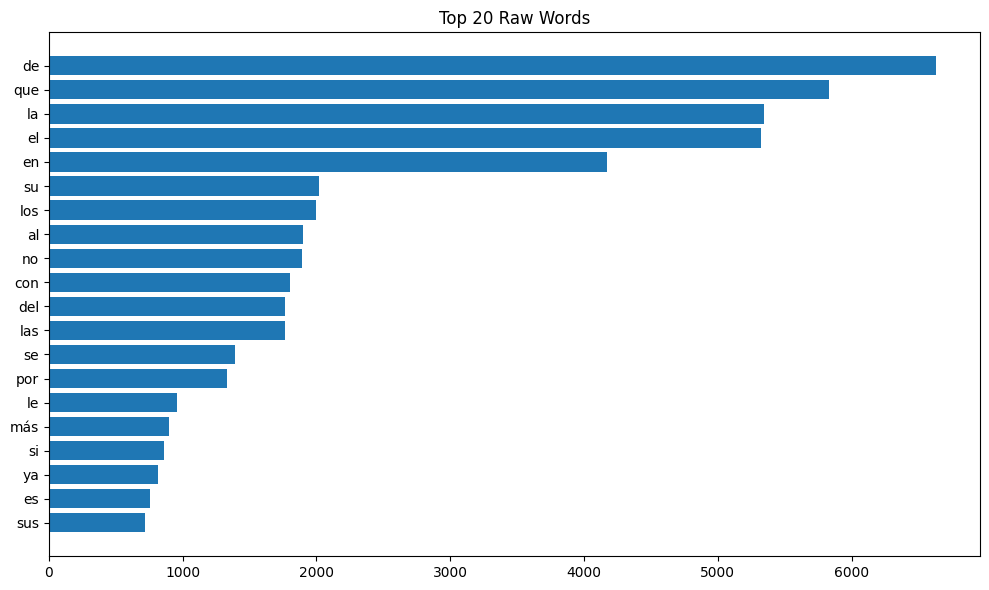

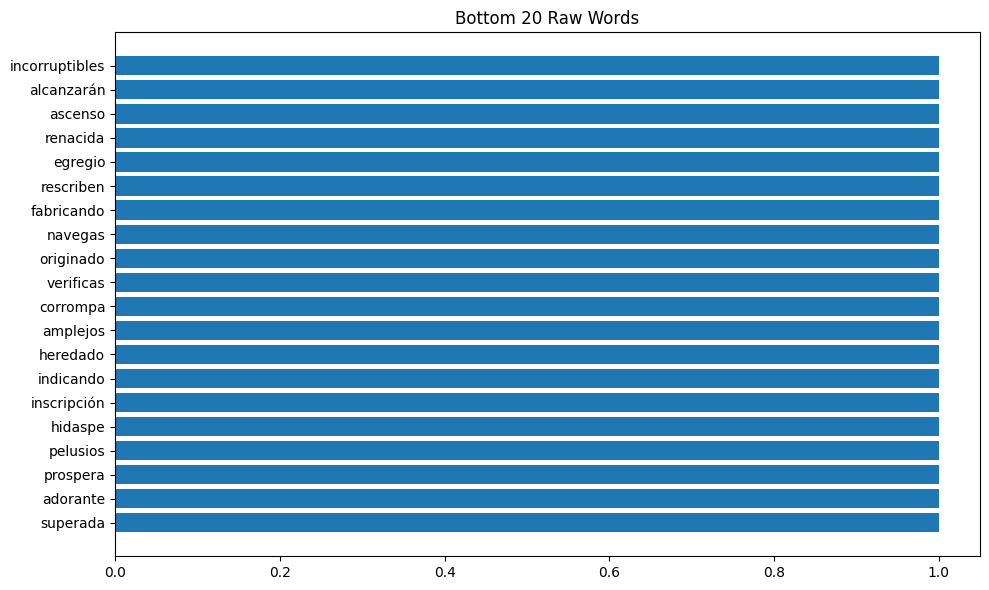

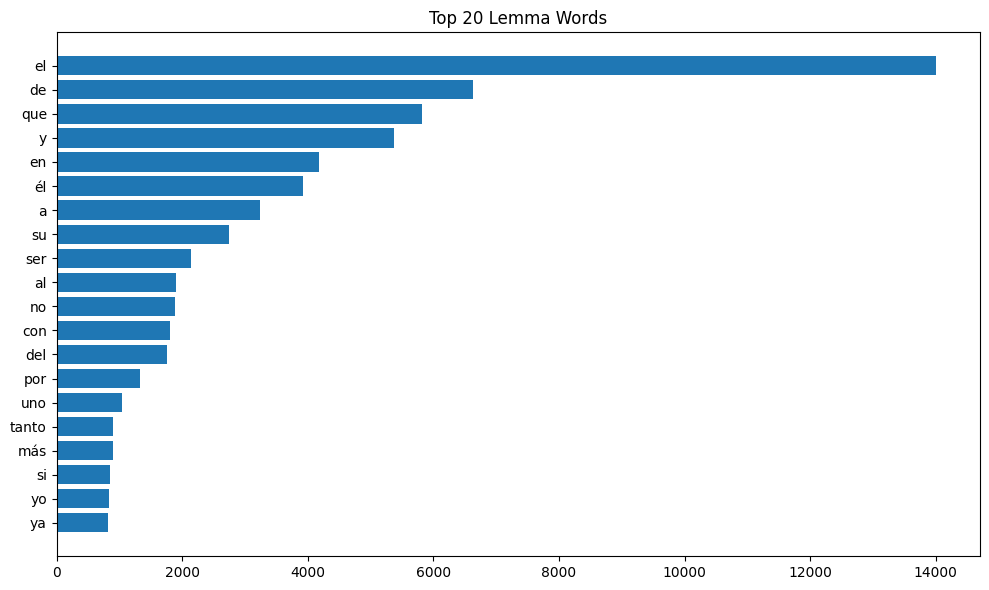

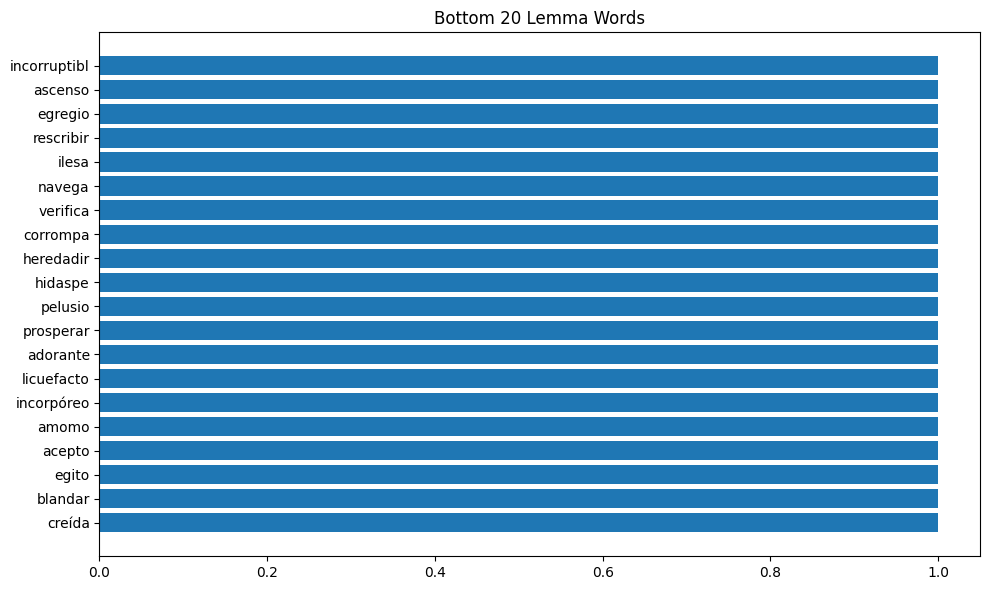

In [2]:
import pandas as pd
import re
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy Spanish model
nlp = spacy.load('es_core_news_sm')

# Load raw texts
texts_df = pd.read_csv(CSV_DIR / 'raw_texts.csv')
docs = texts_df['text'].astype(str).tolist()

# Tokenize without lemmatization
tokens_raw = []
for doc in docs:
    words = re.findall(r'\b\w\w+\b', doc.lower())
    tokens_raw.extend(words)

# Lemmatize
tokens_lemma = []
for doc in docs:
    doc_sp = nlp(doc)
    tokens_lemma.extend([token.lemma_.lower() for token in doc_sp if token.is_alpha])

# Frequency counts
freq_raw = Counter(tokens_raw)
freq_lemma = Counter(tokens_lemma)

# Most and least frequent 20 raw
most_raw = freq_raw.most_common(20)
least_raw = freq_raw.most_common()[:-21:-1]

# Most and least frequent 20 lemma
most_lemma = freq_lemma.most_common(20)
least_lemma = freq_lemma.most_common()[:-21:-1]

# Save to CSV
pd.DataFrame(most_raw, columns=['word','count']).to_csv(EXT_DIR / 'most_raw.csv', index=False)
pd.DataFrame(least_raw, columns=['word','count']).to_csv(EXT_DIR / 'least_raw.csv', index=False)
pd.DataFrame(most_lemma, columns=['word','count']).to_csv(EXT_DIR / 'most_lemma.csv', index=False)
pd.DataFrame(least_lemma, columns=['word','count']).to_csv(EXT_DIR / 'least_lemma.csv', index=False)

# Plot
def plot_counts(df, title, fname):
    plt.figure(figsize=(10,6))
    plt.barh(df['word'][::-1], df['count'][::-1])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(EXT_DIR / fname)
    plt.show()

plot_counts(pd.DataFrame(most_raw, columns=['word','count']), 'Top 20 Raw Words', 'top20_raw.png')
plot_counts(pd.DataFrame(least_raw, columns=['word','count']), 'Bottom 20 Raw Words', 'bottom20_raw.png')
plot_counts(pd.DataFrame(most_lemma, columns=['word','count']), 'Top 20 Lemma Words', 'top20_lemma.png')
plot_counts(pd.DataFrame(least_lemma, columns=['word','count']), 'Bottom 20 Lemma Words', 'bottom20_lemma.png')